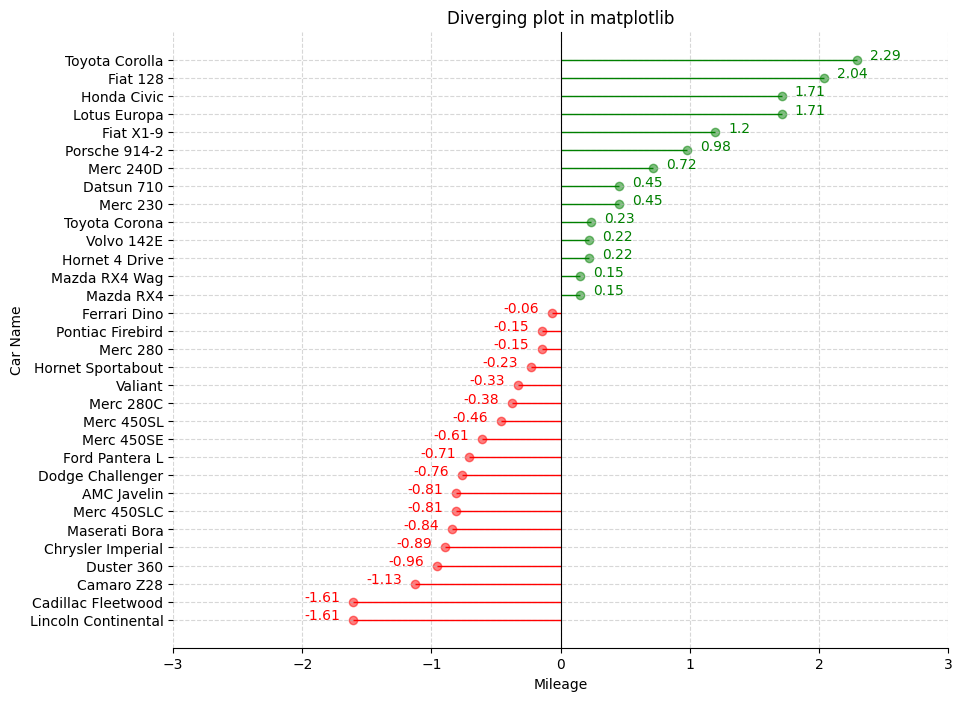

In [1]:
from imports import *
PATH = '../data/mtcars.csv'
df = pd.read_csv(PATH)

# More info:
# https://statisticsbyjim.com/glossary/standardization/
df['x_plot'] = (df['mpg'] - df['mpg'].mean())/df['mpg'].std()

# sort value and reset the index
df.sort_values('x_plot', inplace=True)
df.reset_index(inplace=True)

# create a color list, where if value is above > 0 it's green otherwise red
colors = ['red' if x < 0 else 'green' for x in df['x_plot']]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.hlines(y = df.index, xmin=0, color=colors, xmax=df['x_plot'], linewidth=1)

# iterate over x and y
for x, y in zip(df['x_plot'], df.index):
    # annotate text
    ax.text(x-0.1 if x<0 else x+0.1,
            y,
            round(x, 2),
            color = 'red' if x < 0 else 'green',
            horizontalalignment='right' if x<0 else 'left', 
            size = 10)

    ax.scatter (x, y, color='red' if x <0 else 'green', alpha=0.5)

    # set title
    ax.set_title('Diverging plot in matplotlib')
    # change x lim
    ax.set_xlim(-3, 3)
    
    # set labels
    ax.set_xlabel('Mileage')
    ax.set_ylabel('Car Name')
    
    ax.grid(linestyle='--', alpha=0.5)
    ax.set_yticks(df.index)
    ax.set_yticklabels(df.model)
    ax.spines['top'].set_color('None')
    ax.spines['left'].set_color('None')
    ax.spines['right'].set_position(('data', 0))
    ax.spines['right'].set_color('black')